# Importing libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [44]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [45]:
# Shape of the dataset
df.shape

(1000, 3)

## Plotting DIstribution

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


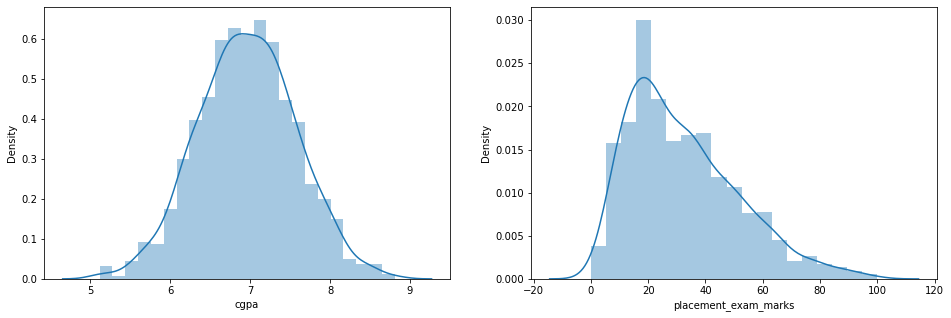

In [68]:
# Set the figure size
plt.figure(figsize=(16, 5))

# Create the first subplot on the left
plt.subplot(1, 2, 1)

# Plot the distribution of 'cgpa' column
sns.distplot(df['cgpa'])

# Create the second subplot on the right
plt.subplot(1, 2, 2)

# Plot the distribution of 'placement_exam_marks' column
sns.distplot(df['placement_exam_marks'])

In [47]:
# Calculate the skewness of the 'cgpa' column in the DataFrame 'df'
df['cgpa'].skew()

-0.014529938929314918

In [48]:
# Calculate the skewness of the 'placement_exam_marks' column in the DataFrame 'df'
df['placement_exam_marks'].skew()

0.8356419499466834

As observed in the plots and confirmed by the skewness function, the 'cgpa' column exhibits a normal distribution, while the 'placement_exam_marks' column is skewed. Since the z-score technique is most effective when applied to normally distributed data, we will focus solely on the 'cgpa' column.

In [49]:
# Generate descriptive statistics for the 'cgpa' column in the DataFrame 'df'
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [50]:
# Calculate the lower limit for detecting outliers using the z-score method
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()

# Print the lower limit
print('Lower limit:', lower_limit)

# Calculate the upper limit for detecting outliers using the z-score method
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()

# Print the upper limit
print('Upper limit:', upper_limit)

Lower limit : 5.113546374602842
Upper limit : 8.808933625397177


In [51]:
# Identify outliers in the 'cgpa' column based on the lower and upper limits
outliers = df[(df['cgpa'] < lower_limit) | (df['cgpa'] > upper_limit)]

# Display the DataFrame containing the outliers
outliers

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

### Approach 1

In [52]:
# Create a new DataFrame 'df1' containing data within the lower and upper limits for the 'cgpa' column
df1 = df[(df['cgpa'] > lower_limit) & (df['cgpa'] < upper_limit)]

# Display the first few rows of the DataFrame 'df1'
df1.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [53]:
# Shape of the newly created dataset 'df1'
df1.shape

(995, 3)

### Approach 2 using Z-score

In [54]:
# Calculate the Z-score for the 'cgpa' column and create a new column 'cgpa_Zscore'
# Z-score measures how many standard deviations a data point is from the mean
df['cgpa_Zscore'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()

In [55]:
df

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [56]:
# Select rows in the DataFrame where the 'cgpa_Zscore' is less than -3
outliers_low = df[df['cgpa_Zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [57]:
# Select rows in the DataFrame where the 'cgpa_Zscore' is more than 3
df[df['cgpa_Zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [58]:
# Select rows in the DataFrame where the 'cgpa_Zscore' is either less than -3 or greater than 3
df[(df['cgpa_Zscore'] < -3) | (df['cgpa_Zscore'] > 3)]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [61]:
# Create a new DataFrame 'df2' containing data points within -3 to 3 standard deviations from the mean
df2 = df[(df['cgpa_Zscore'] > -3) & (df['cgpa_Zscore'] < 3)]

# Display the first few rows of the DataFrame 'df2'
df2.head()

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [62]:
df2.shape

(995, 4)

# Capping 

In [63]:
# Calculate the lower limit for detecting outliers using the z-score method
lower_limit = df['cgpa'].mean() - 3 * df['cgpa'].std()

# Print the lower limit
print('Lower limit:', lower_limit)

# Calculate the upper limit for detecting outliers using the z-score method
upper_limit = df['cgpa'].mean() + 3 * df['cgpa'].std()

# Print the upper limit
print('Upper limit:', upper_limit)

Lower limit : 5.113546374602842
Upper limit : 8.808933625397177


In [64]:
# Use NumPy's 'np.where' to replace 'cgpa' values that are outside the lower and upper limits
# Values below the lower limit are replaced with the lower limit, 
# and values above the upper limit are replaced with the upper limit
# Values within the limits remain unchanged

df['cgpa'] = np.where(
    df['cgpa'] < lower_limit,  # Condition for values below the lower limit
    lower_limit,              # Value to replace if the condition is met
    np.where(
        df['cgpa'] > upper_limit,  # Condition for values above the upper limit
        upper_limit,              # Value to replace if the condition is met
        df['cgpa']                # Value to keep if neither condition is met
    )
)


In [67]:
df.shape

(1000, 4)

In [66]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64